# **K-Nearest Neighbors (KNN) Overview**

K-Nearest Neighbors (KNN) is a simple, non-parametric, instance-based machine learning algorithm used for both classification and regression tasks. It works by identifying the ‘k’ data points in the training set that are closest to a new input point based on a distance metric (such as Euclidean distance). The class label (for classification) or the average value (for regression) of these neighbors is then used to make the prediction. KNN does not involve any explicit model training; instead, it memorizes the training data and makes predictions at runtime.

## How KNN works:

- Choose the number of neighbors k.
- Calculate the distance between the new point and all points in the training dataset.
- Select the k nearest neighbors based on the calculated distances.
- For classification: return the most common class among the neighbors.
- For regression: return the average of the neighbor values.

## Common Distance Metrics

- **Euclidean:**

  \\[
  d(p, q) = \sqrt{ \sum_{i=1}^{n} (p_i - q_i)^2 }
  \\]

- **Manhattan:**

  \\[
  d(p, q) = \sum_{i=1}^{n} |p_i - q_i|
  \\]


# Implementation of the K-Nearest Neighbours Algorithm

In [1]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, p, q):
        return np.sqrt(np.sum((p - q) ** 2))
    
    def _predict(self, x):
        # Compute the distances
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]

        # Get the K nearest samples, labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Majority vote, most common class label
        most_common = Counter(k_nearest_labels).most_common(1)

        return most_common[0][0]

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)


In [2]:
# Helper method for finding accuracy
def accuracy(y_test, y_pred):
    return np.sum(y_pred == y_test) / len(y_test)

# Loading and visualizing the data

Attempting to Load Iris Dataset
Dataset Loaded successfully
Visualizing the Dataset


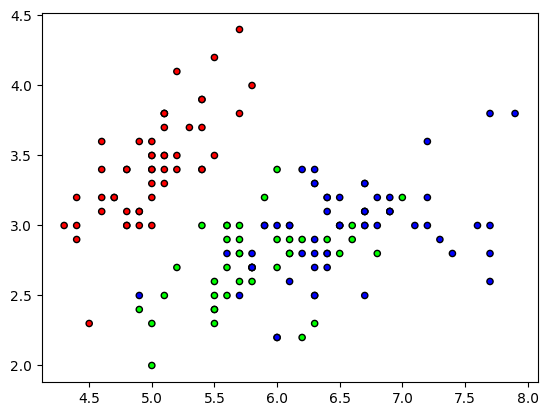

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

print('=' * 50)
print('Attempting to Load Iris Dataset')
iris = datasets.load_iris()
X, y = iris.data, iris.target
print('Dataset Loaded successfully')
print('=' * 50)
print('Visualizing the Dataset')
cmap =ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap, edgecolor = 'k', s = 20)

## Splitting the Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=1234)

print('*' * 50)
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('*' * 50)

**************************************************
X_train Shape:  (120, 4)
y_train Shape:  (120,)
**************************************************


## Predicting using the KNN algorithm

In [5]:
classifier = KNN(k = 3)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

accuracy = accuracy(y_test = y_test, y_pred = pred)
print('Accuracy: ', accuracy)

Accuracy:  1.0


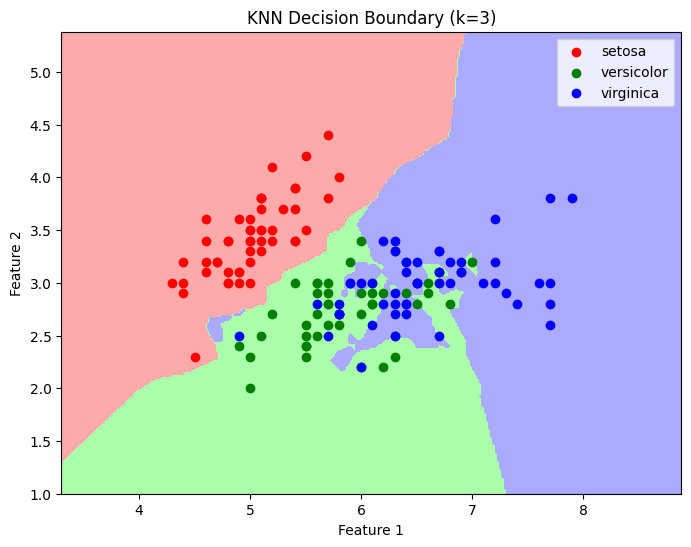

In [6]:
from matplotlib.colors import ListedColormap

def plot_knn_decision_boundary(X, y, k=3):
    h = 0.02
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']

    knn = KNN(k = 3)
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    for i, color in zip(np.unique(y), cmap_bold):
        plt.scatter(X[y == i, 0], X[y == i, 1], c=color, label=iris.target_names[i])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f"KNN Decision Boundary (k={k})")
    plt.legend()
    plt.show()

# Example using only first two features
plot_knn_decision_boundary(X[:, :2], y, k=3)


Hence the Simple KNN is implemented in python and executed succussfully. You can try with different random_states fo the dataset to see how it reflect on the accuracy of our model and the decision boundary...